In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm

In [50]:
# Definindo a função de calculo da densidade de  propabilidade
def probXDadoC(x1, x2, cor, s, c):
    aid = (((x1-c[0])**2/s[0]**2) + ((x2-c[1])**2/s[1]**2)- (2*cor*(x1-c[0])*(x2-c[1])/(s[0]*s[1])))
    e = np.exp(-1/(2*(1-cor**2))*aid)
    ans = 1/(2*np.pi*s[0]*s[1]*np.sqrt(1-cor**2)) * e
    return ans

In [51]:
# Definindo função que aplica o teorema de Bayes
# def classe(x1,x2,s1,s2,c1,c2, cor1=0, cor2=0):
#     d = 1*((Pxc1*probXDadoC(x1,x2,cor1,s1,c1))/(Pxc2*probXDadoC(x1,x2,cor2,s2,c2))>1)
#     return d
def classe (v, mu1, sigma1, )

SyntaxError: invalid syntax (<ipython-input-51-1707ee0892ba>, line 5)

In [52]:
# Gerando os dados
C1 = 2
C2 = 4
S1 = 0.4
S2 = 0.4
N = 200
Des1 = 1
trainTest = 0.1
Ex2 = 1

if Des1 < 1:
    raise Exception (f'O valor de Des1 devera ser maior ou igual a 1, seu valor foi de {Des1}')

xc1 = np.random.normal(loc=C1, scale=S1, size=(N*Des1,2))
xc2 = np.random.normal(loc=C2, scale=S2, size=(N,2))

# Dividindo em dados de treino e de teste
trainx1 = xc1[(int(trainTest*N)):]
trainx2 = xc2[(int(trainTest*N)):]
test = np.concatenate((xc1[:(int(trainTest*N))], xc2[:(int(trainTest*N))]))

if Ex2 == 1:
    C3, C4 = [2, 4],[4, 2]
    S3, S4 = S1, S2 
    xc3 = np.random.normal(loc=C3, scale=S3, size=(N*Des1,2))
    xc4 = np.random.normal(loc=C4, scale=S4, size=(N,2))
    trainx3 = xc3[(int(trainTest*N)):]
    trainx4 = xc4[(int(trainTest*N)):]
    test = np.concatenate((test, xc3[:(int(trainTest*N))], xc4[:(int(trainTest*N))]))
    trainxc1 = np.concatenate((trainx1, trainx2))
    trainxc2 = np.concatenate((trainx3, trainx4))
else:
    trainxc1 = trainx1
    trainxc2 = trainx2

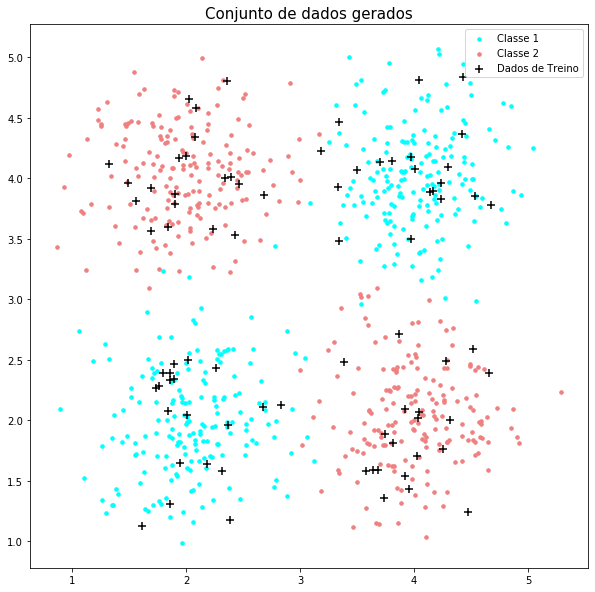

In [53]:
# Plotando os gráficos dos dados de treino e de teste
plt.figure(figsize=(10,10))
plt.scatter(trainxc1[:,0], trainxc1[:,1], s = 50, marker = '.', color='aqua', label = 'Classe 1')
plt.scatter(trainxc2[:,0], trainxc2[:,1], s = 50, marker = '.', color='lightcoral', label = 'Classe 2')
plt.scatter(test[:,0], test[:,1], s = 50, marker = '+', color='k', label = 'Dados de Treino')
plt.title('Conjunto de dados gerados', size = 15)
plt.legend()
plt.show()

In [55]:
# Calculando as médias e os desvios padrão de cada grupo de dados de treino
mean1 = np.mean(trainxc1, axis = 0)
mean2 = np.mean(trainxc2, axis = 0)
sd1 = np.std(trainxc1, axis = 0)
sd2 = np.std(trainxc2, axis = 0)
Cor1 = np.cov(np.transpose(trainxc1))


In [56]:
# Calculando probapilidades marginais ou evidencias
Pxc1 = len(trainxc1)/(len(trainxc1)+len(trainxc2))
Pxc2 = len(trainxc2)/(len(trainxc1)+len(trainxc2))
print(f'Probabilidade marginal de ser da classe 1: {Pxc1}\nProbabilidade marginal de ser da classe 2: {Pxc2}')

Probabilidade marginal de ser da classe 1: 0.5
Probabilidade marginal de ser da classe 2: 0.5


[0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.
C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: No contour levels were found within the data range.


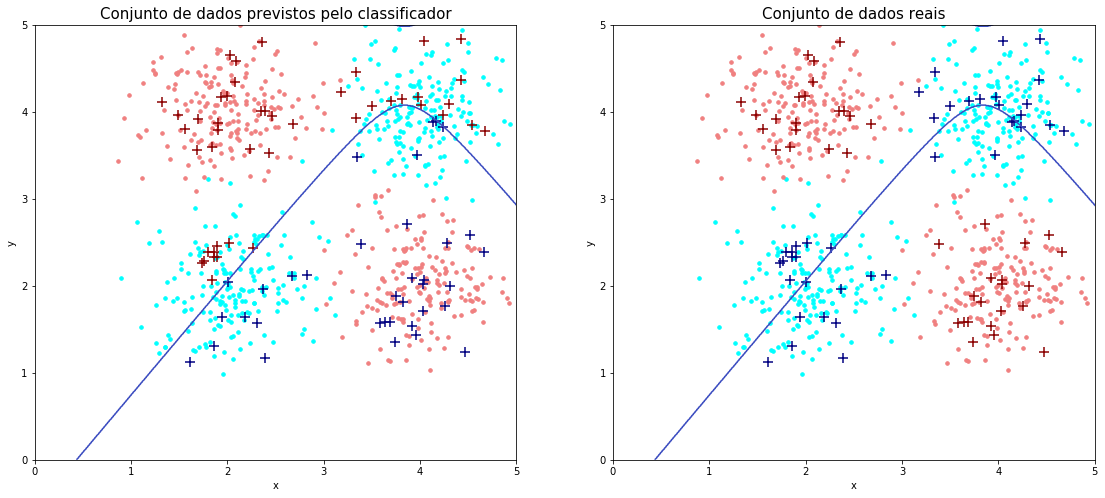

In [58]:
# Definindo em qual classe estão os pontos de teste
classificador = classe(test[:,0], test[:,1], sd1, sd2, mean1, mean2)
print(classificador)

# Criando linha de separação dos dados
Xtest, Ytest = np.meshgrid(np.linspace(0,6,1000),np.linspace(0,6,1000))
separador = classe(Xtest, Ytest, sd1, sd2, mean1, mean2)

# Plotando os gráficos
colours = ['darkred', 'navy']
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (19,8))

# Gráfico de classificação do algorítimo
ax1.scatter(trainxc1[:,0], trainxc1[:,1], s= 50, marker = '.', color='aqua', label = 'Classe 1')
ax1.scatter(trainxc2[:,0], trainxc2[:,1], s= 50, marker = '.', color='lightcoral', label = 'Classe 2')
ax1.scatter(test[:, 0],test[:, 1], s= 100, marker = '+',c=classificador, cmap = cm.ListedColormap(colours))
ax1.contour(Xtest, Ytest, separador, levels = 0, cmap='coolwarm')
ax1.set_title('Conjunto de dados previstos pelo classificador', size = 15)
ax1.set(xlabel='x', ylabel='y')
ax1.set_xlim((0,5))
ax1.set_ylim((0,5))

# Gráficos dos dados reais
ax2.scatter(trainxc1[:,0], trainxc1[:,1], s= 50, marker = '.', color='aqua')
ax2.scatter(trainxc2[:,0], trainxc2[:,1], s= 50, marker = '.', color='lightcoral')
if Ex2 == 1:
    ax2.scatter(xc1[:int(trainTest*N),0], xc1[:int(trainTest*N),1], s= 100, marker = '+', color='navy')
    ax2.scatter(xc2[:int(trainTest*N),0], xc2[:int(trainTest*N),1], s= 100, marker = '+', color='navy')
    ax2.scatter(xc3[:int(trainTest*N),0], xc3[:int(trainTest*N),1], s= 100, marker = '+', color='darkred')
    ax2.scatter(xc4[:int(trainTest*N),0], xc4[:int(trainTest*N),1], s= 100, marker = '+', color='darkred')
else:
    ax2.scatter(xc1[:int(trainTest*N),0], xc1[:int(trainTest*N),1], s= 100, marker = '+', color='navy')
    ax2.scatter(xc2[:int(trainTest*N),0], xc2[:int(trainTest*N),1], s= 100, marker = '+', color='darkred')
ax2.contour(Xtest, Ytest, separador, levels = 0, cmap='coolwarm')
ax2.set_title('Conjunto de dados reais', size = 15)
ax2.set(xlabel='x', ylabel='y')
ax2.set_xlim((0,5))
ax2.set_ylim((0,5))
plt.show()

In [46]:
# Por fim, calculamos a taxa de acerto do nosso algoritmo
certos = 0
errados = 0

for i in range(len(classificador)):
    if i < (int(trainTest*N)) and classificador[i] == 1:
        certos += 1
    elif i < (int(trainTest*N)) and classificador[i] != 1:
        errados += 1
    elif i >= (int(trainTest*N)) and classificador[i] == 0:
        certos += 1
    else:
        errados += 1
        
print(f'Numero de acertos: {certos}\nNúmeros de erros: {errados}\nPorcentagem de acertos: {certos/(certos+errados)*100:.2f}%')

Numero de acertos: 60
Números de erros: 20
Porcentagem de acertos: 75.00%
